In [1]:
from gfactor.main.gfactorsolar import SolarSpectrum
from gfactor.querying.LISIRDQuerying import LISIRDRetriever

import numpy as np
import pandas as pd
import math

from datetime import datetime as dt
from datetime import date, timedelta

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import seaborn as sns

import os
from astropy.convolution import convolve, Gaussian1DKernel
from astropy import units as u
from astropy.units import Quantity

In [2]:
sns.set_theme(style="darkgrid", palette="muted")

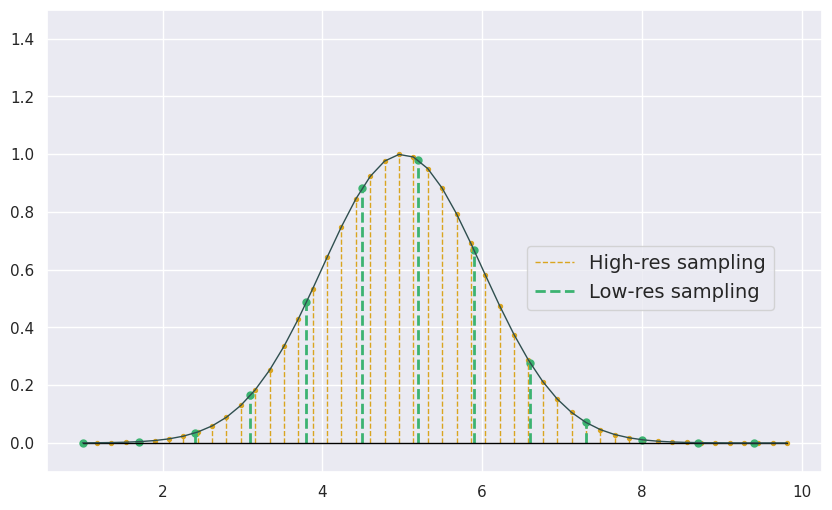

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
x_dense = np.arange(1, 10, .18)
y_dense = np.exp(-.5*np.square((x_dense - 5) / 1))
x_sparse = np.arange(1, 10, .7)
y_sparse = np.exp(-.5*np.square((x_sparse - 5) / 1))
ax.vlines(x=x_dense, ymin=0, ymax=y_dense, color='goldenrod', label='High-res sampling', linewidth=1, linestyles='dashed')
ax.vlines(x=x_sparse, ymin=0, ymax=y_sparse, color='mediumseagreen', label='Low-res sampling', linewidth=2, linestyles='dashed')
ax.plot(x_dense, [0]*len(x_dense), color='black', linewidth=1)
ax.plot(x_dense, y_dense, color='darkslategrey', linewidth=1)
ax.scatter(x_dense, y_dense, color='goldenrod', s=8)
ax.scatter(x_sparse, y_sparse, color='mediumseagreen', s=25)
ax.set_ylim(-.1, 1.5)
ax.legend(loc='lower right', bbox_to_anchor=(.95, 0.33), fontsize=14)
plt.show()

In [4]:
os.chdir("/home/blight25/projects/gfactor")
os.getcwd()

'/home/blight25/projects/gfactor'

In [5]:
lisird_retriever = LISIRDRetriever()
min_date = lisird_retriever.datasets["NNL_high_res"]["min_date"]
max_date = lisird_retriever.datasets["NNL_high_res"]["max_date"]
min_date, max_date

(datetime.date(1874, 5, 9), datetime.date(2023, 12, 31))

In [ ]:
sumer = SolarSpectrum.sumer_spectrum(emissions={"Lyman-Alpha": [1214, 1218], 
                                                "OI 1302": [1301, 1303.5], 
                                                "OI 1305": [1303.5, 1307], 
                                                "CI 1335": [1333, 1337]})

In [7]:
nnl = SolarSpectrum.daily_spectrum(date="2014-04-15", dataset="NNL", res="high")

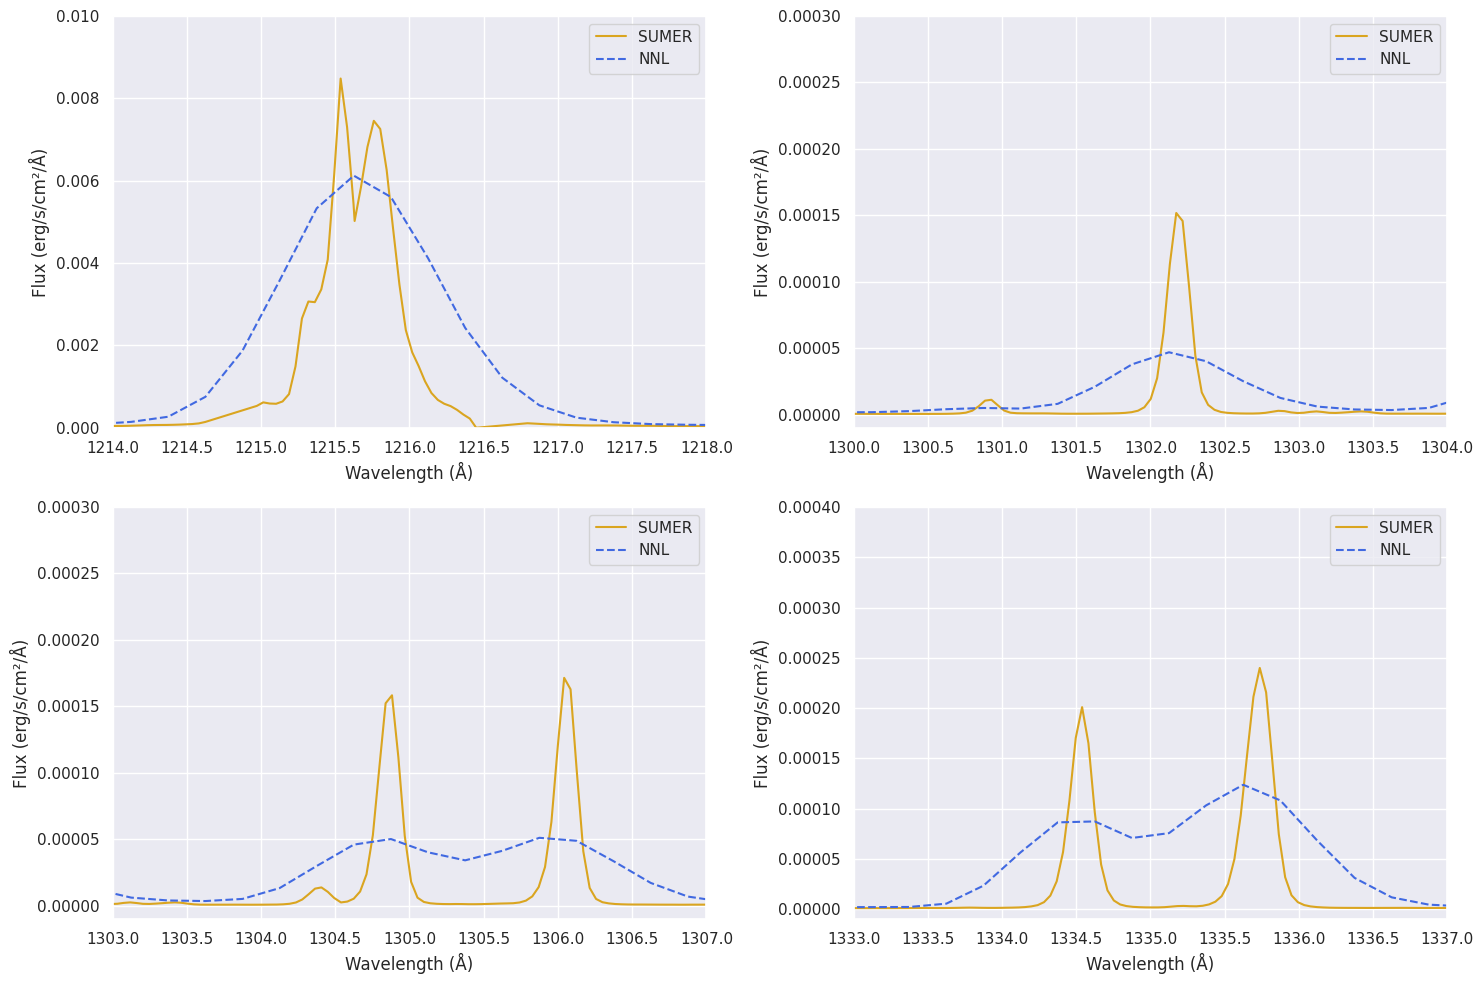

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

ax1.plot(sumer.spectral_axis, sumer.flux, label="SUMER", color="goldenrod")
ax1.plot(nnl.spectral_axis, nnl.flux, label="NNL", color="royalblue", linestyle="--")
ax1.set_xlim(1214, 1218)
ax1.set_ylim(-1e-5, 1e-2)

ax2.plot(sumer.spectral_axis, sumer.flux, label="SUMER", color="goldenrod")
ax2.plot(nnl.spectral_axis, nnl.flux, label="NNL", color="royalblue", linestyle="--")
ax2.set_xlim(1300, 1304)
ax2.set_ylim(-1e-5, 3e-4)

ax3.plot(sumer.spectral_axis, sumer.flux, label="SUMER", color="goldenrod")
ax3.plot(nnl.spectral_axis, nnl.flux, label="NNL", color="royalblue", linestyle="--")
ax3.set_xlim(1303, 1307)
ax3.set_ylim(-1e-5, 3e-4)

ax4.plot(sumer.spectral_axis, sumer.flux, label="SUMER", color="goldenrod")
ax4.plot(nnl.spectral_axis, nnl.flux, label="NNL", color="royalblue", linestyle="--")
ax4.set_xlim(1333, 1337)
ax4.set_ylim(-1e-5, 4e-4)

for ax in [ax1, ax2, ax3, ax4]:
    ax.legend()
    ax.set_xlabel("Wavelength (Å)")
    ax.set_ylabel("Flux (erg/s/cm²/Å)")

plt.tight_layout()
plt.show()

In [9]:
cur_date = date(1979, 1, 1)
lyman_ratios = []
OI_1302_ratios = []
OI_1305_ratios = []
CI_1335_ratios = []
dates = []
while cur_date <= max_date:
    nnl = SolarSpectrum.daily_spectrum(date=cur_date.strftime("%Y-%m-%d"), dataset="NNL", 
                                       res="high",
                                       emissions={"Lyman-Alpha": [1214, 1218], 
                                                "OI 1302": [1300, 1304], 
                                                "OI 1305": [1303, 1307], 
                                                "CI 1335": [1333, 1337]})
    
    LYMAN = nnl.emissions['Lyman-Alpha']['Integrated Flux'] / \
                  sumer.emissions['Lyman-Alpha']['Integrated Flux']
    lyman_ratios.append(LYMAN)

    OI_1302 = nnl.emissions['OI 1302']['Integrated Flux'] / \
                  sumer.emissions['OI 1302']['Integrated Flux']
    OI_1302_ratios.append(OI_1302)
    

    OI_1305 = nnl.emissions['OI 1305']['Integrated Flux'] / \
                  sumer.emissions['OI 1305']['Integrated Flux']
    OI_1305_ratios.append(OI_1305)
    

    CI_1335 = nnl.emissions['CI 1335']['Integrated Flux'] / \
                  sumer.emissions['CI 1335']['Integrated Flux']
    CI_1335_ratios.append(CI_1335)  
    
    dates.append(cur_date)
    cur_date += timedelta(days=15)

KeyError: 'OI 1302'

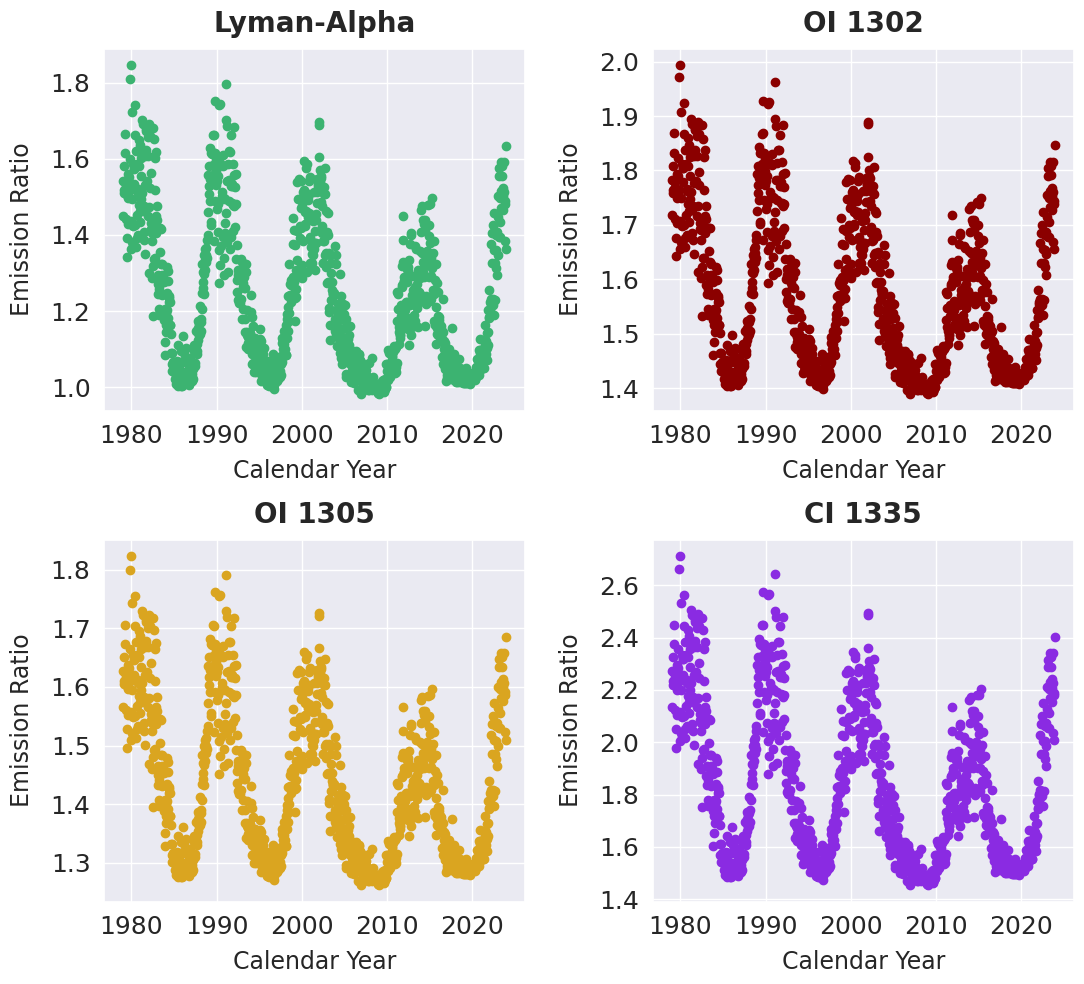

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(11, 10))

ax1.scatter(dates, lyman_ratios, color="mediumseagreen")
ax1.set_title("Lyman-Alpha", fontsize=20, fontweight="bold", pad=12)

ax2.scatter(dates, OI_1302_ratios, color="darkred")
ax2.set_title("OI 1302", fontsize=20, fontweight="bold", pad=12)

ax3.scatter(dates, OI_1305_ratios, color="goldenrod")
ax3.set_title("OI 1305", fontsize=20, fontweight="bold", pad=12)

ax4.scatter(dates, CI_1335_ratios, color="blueviolet")
ax4.set_title("CI 1335", fontsize=20, fontweight="bold", pad=12)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel("Calendar Year", fontsize=17, labelpad=8)
    ax.set_ylabel("Emission Ratio", fontsize=17, labelpad=12)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.xaxis.set_major_locator(mdates.YearLocator(10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.subplots_adjust(hspace=0.3)
fig.tight_layout()
plt.show()